
# **IMAGENET - VGG16 - NESNE TANIMA**


---



**Colab** için kimlik doğrulama adımları:

In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


**Google Drive** içinde ve doğru klasörde bulunmamız için gereken ve kontrol adımları:

In [2]:
import os 
os.chdir("/gdrive/My Drive/SSA/MODÜL3/NesneTanima/")

In [1]:
!ls

ResNet50_NesneTanima_ImageNet.ipynb resnet50_nesnetanima_imagenet.py
VGG16_NesneTanima.ipynb             save_models
images                              vgg16_nesnetanima.py


### Kütüphane Kurulumu

In [2]:
!pip3 install -q keras

**ImageNet projesi, görsel nesne tanıma yazılımı araştırmasında kullanılmak üzere tasarlanmış geniş bir görsel veritabanıdır.**

*On milyondan fazla etiketli resim bulunmaktadır.*

**ImageNet veri setinde önceden eğitilmiş bir modeli göreceğiz. 16 katmanlı VGG Net (VGG16) modelini kullanacağız**


![alt text](https://github.com/hnarayanan/artistic-style-transfer/raw/05c95e5ac7001201d1ae9bf734a9224cf3445388/notebooks/images/imagenet-sample.jpg)



**Keras kütüphanesinden import edilmesi gerekenler: VGG16 eğitilmiş modeli**

In [3]:
import numpy as np
from PIL import Image

from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input, decode_predictions


**Keras'ta önceden ImageNet veri kümesinde eğitilmiş  bir modeli yükleme **

In [4]:
model = VGG16(weights = 'imagenet', include_top=True)

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 49s 0us/step


**Model yapısına bir göz atalım**: Hangi katmanlar var ve katmanların özellikleri neler...

In [5]:
layers = dict([(layer.name, layer.output) for layer in model.layers])
layers

{'input_layer': <KerasTensor shape=(None, 224, 224, 3), dtype=float32, sparse=False, name=keras_tensor>,
 'block1_conv1': <KerasTensor shape=(None, 224, 224, 64), dtype=float32, sparse=False, name=keras_tensor_1>,
 'block1_conv2': <KerasTensor shape=(None, 224, 224, 64), dtype=float32, sparse=False, name=keras_tensor_2>,
 'block1_pool': <KerasTensor shape=(None, 112, 112, 64), dtype=float32, sparse=False, name=keras_tensor_3>,
 'block2_conv1': <KerasTensor shape=(None, 112, 112, 128), dtype=float32, sparse=False, name=keras_tensor_4>,
 'block2_conv2': <KerasTensor shape=(None, 112, 112, 128), dtype=float32, sparse=False, name=keras_tensor_5>,
 'block2_pool': <KerasTensor shape=(None, 56, 56, 128), dtype=float32, sparse=False, name=keras_tensor_6>,
 'block3_conv1': <KerasTensor shape=(None, 56, 56, 256), dtype=float32, sparse=False, name=keras_tensor_7>,
 'block3_conv2': <KerasTensor shape=(None, 56, 56, 256), dtype=float32, sparse=False, name=keras_tensor_8>,
 'block3_conv3': <KerasTen

**Toplam parametre sayısı da bize fikir verebilir** 

In [6]:
model.count_params()

138357544

**Drive da bulunduğumuz klasörün içindeki test görüntülerimizin dosya isimlerini görelim ve test işlemi için bu görselleri çağıralım**

In [10]:
import os
os.chdir("/gdrive/My Drive/SSA/MODÜL3/NesneTanima/images")

In [11]:
!ls

bb.jpeg    drive    inek.jpg	 olips3.jpeg  van-kedisi.jpg
betty.jpg  f16.jpg  olips2.jpeg  olips.jpeg


**Bir test resmi yükleyelim ve ön işlemler yapalım**

*   f16
*   inek
*  Van kedisi
*  Olips 



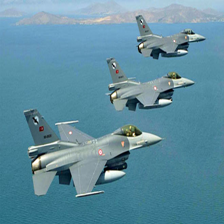

In [8]:
image_path = 'images/f16.jpg'
image = Image.open(image_path) 
image = image.resize((224, 224))
image

In [10]:
x = np.array(image, dtype = 'float32') #görüntüyü diziye çevirir
x = np.expand_dims(x, axis=0) #dizi listesine çevirir
x= preprocess_input(x)

### **TEST GÖRÜNTÜSÜ İLE SINIFLAMA YAPMA**
<img align="left" width="200" height="200" src="https://cloud.githubusercontent.com/assets/532272/21507867/3376e9fe-cc4a-11e6-9350-7ec4f680da36.gif">



In [13]:
preds = model.predict(x)
print('predicted:', decode_predictions(preds, top=3)[0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
predicted: [('n04552348', 'warplane', 0.76758915), ('n02687172', 'aircraft_carrier', 0.14120461), ('n01494475', 'hammerhead', 0.041954953)]


In [12]:
print(decode_predictions(preds, top=1)[0][0][1])

warplane
